# Salary Predictions Based on Job Descriptions

## DEFINE

### ---- Define the problem ----

Looking for salary trend based on different job types, IDs, degrees, industries and majors, determining which one is the most important factor could impact on individual's salary distribution.

In [1]:
#import your libraries
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
%matplotlib inline

#your info here
__author__ = "Ya Yu Chen"
__email__ = "a725761@gmail.com"

## DISCOVER

### ---- Load the data ----

In [2]:
def load_data(file_path):
    return pd.read_csv(file_path)

In [3]:
train_features = 'data/train_features.csv'
test_features = 'data/train_features.csv'
train_target = 'data/train_salaries.csv'

train_feature_df = load_data(train_features)
test_feature_df = load_data(test_features)
train_target_df = load_data(train_target)

In [4]:
train_df = pd.merge(train_feature_df, train_target_df, how='inner', on='jobId')
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [5]:
# divide categorical and numerical features for later use
cat_feature = [i for i in train_feature_df.columns if train_feature_df[i].dtype.name == 'object' or train_feature_df[i].dtype.name == 'category']
num_feature = [i for i in train_feature_df.columns if train_feature_df[i].dtype.name == 'int64'  or train_feature_df[i].dtype.name == 'float']

### ---- Clean the data ----

In [6]:
#check any missing values
train_df.isnull().any()

jobId                  False
companyId              False
jobType                False
degree                 False
major                  False
industry               False
yearsExperience        False
milesFromMetropolis    False
salary                 False
dtype: bool

In [7]:
# check any duplicated data
train_df.duplicated().sum()

0

In [8]:
#check type of features
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [9]:
# numerical data statistical analysis
train_df.describe(include=[np.number])

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [10]:
# categorical data statistical analysis
train_df.describe(include=['O'])

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362684554734,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


C:\Users\EllenChen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\EllenChen\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


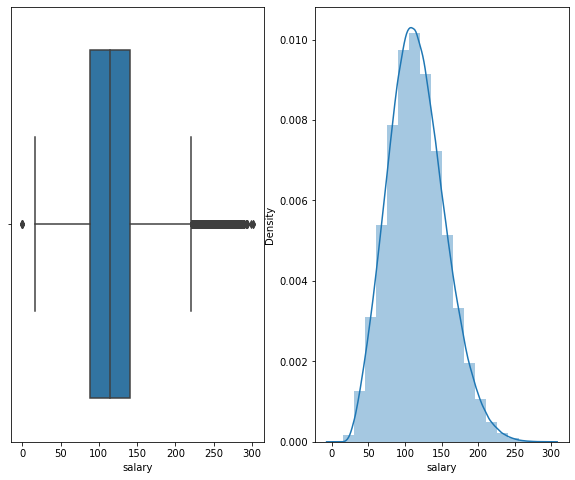

In [11]:
# plot salary's distribution and boxplot
plt.figure(figsize=(10,8))
plt.subplot(121)
sns.boxplot(train_df.salary)
plt.subplot(122)
sns.distplot(train_df.salary, bins=20)
plt.show()

In [12]:
# find out the quartile of salary and outliers
quartile = train_df.salary.describe()
IQR = quartile['75%'] - quartile['25%']
above_outlier = quartile['75%'] + IQR*1.5
lower_outlier = quartile['25%'] - IQR*1.5

In [13]:
train_df[train_df['salary']>above_outlier]['jobType'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

In [14]:
train_df[(train_df['salary']>above_outlier) & (train_df['jobType']=='JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


In [15]:
# it is unreasonable to have 0 salary for high level degree or job type employee
train_df[train_df['salary']<lower_outlier]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [16]:
# remove unreliable data
train_df = train_df[train_df['salary']>lower_outlier]

# shuffle data
train_df = shuffle(train_df).reset_index()

### ---- Explore the data (EDA) ----

In [17]:
def plot_feature(df, col):
    '''
    Make plot for each features
    left, the distribution of samples on the feature
    right, the dependance of salary on the feature
    '''
    plt.figure(figsize = (14, 6))
    plt.subplot(1, 2, 1)
    if df[col].dtype == 'int64':
        df[col].value_counts().sort_index().plot()
    else:
        #change the categorical variable to category type and order their level by the mean salary
        #in each category
        mean = df.groupby(col)['salary'].mean()
        df[col] = df[col].astype('category')
        levels = mean.sort_values().index.tolist()
        df[col].cat.reorder_categories(levels, inplace=True)
        df[col].value_counts().plot()
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.subplot(1, 2, 2)

    if df[col].dtype == 'int64' or col == 'companyId':
        #plot the mean salary for each category and fill between the (mean - std, mean + std)
        mean = df.groupby(col)['salary'].mean()
        std = df.groupby(col)['salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                         alpha = 0.1)
    else:
        sns.boxplot(x = col, y = 'salary', data=df)
    
    plt.xticks(rotation=45)
    plt.ylabel('Salaries')
    plt.show()

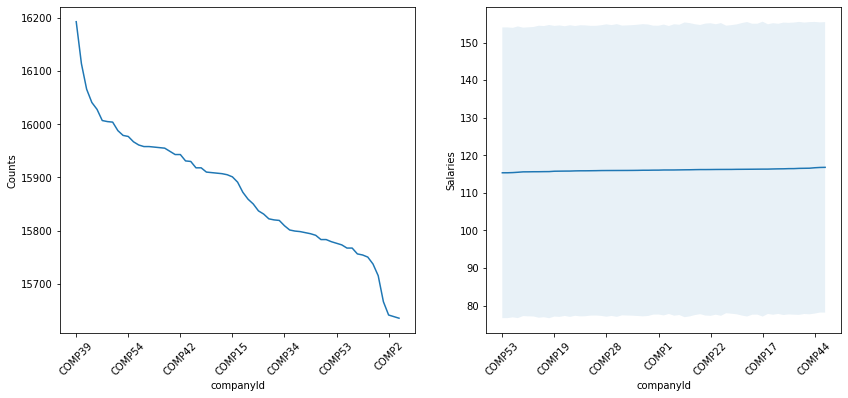

None


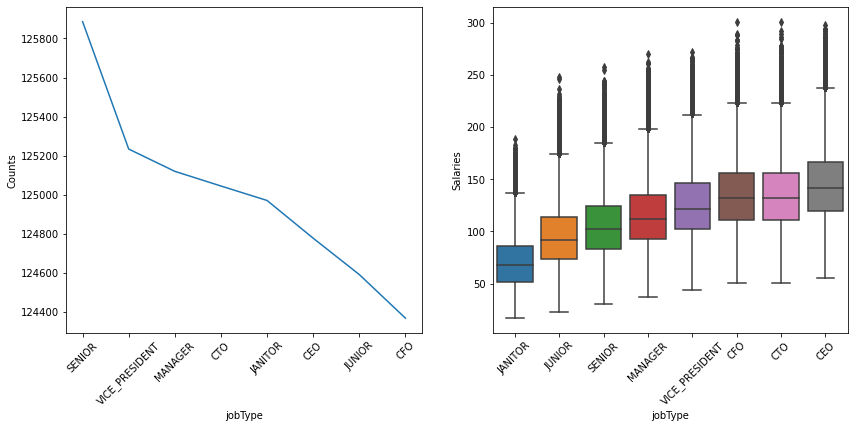

None


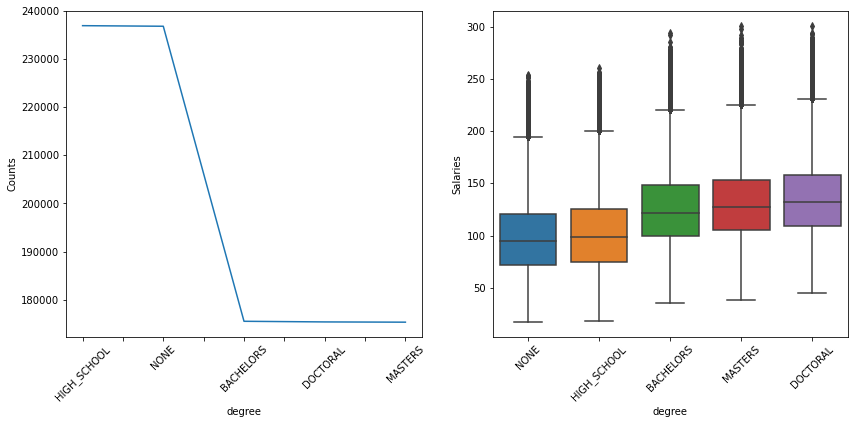

None


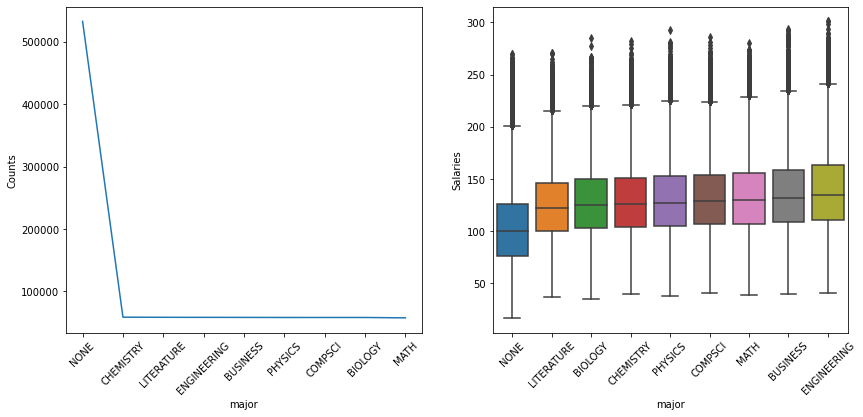

None


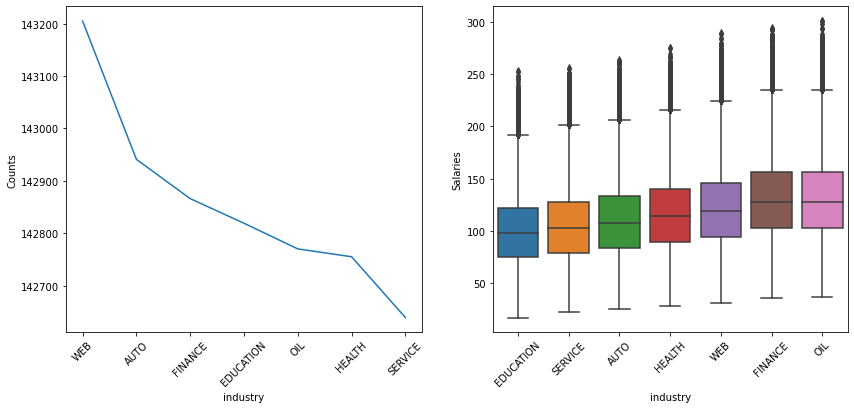

None


In [18]:
# using plot feature function to examine each feature's correlation with salary 
for i in cat_feature[1:]:
    print(plot_feature(train_df, i))

In [19]:
transform_df = train_df.copy()

In [20]:
def transform_value(df, col):
    cate_dict = {}
    cate_keys = df[col].cat.categories.tolist()
    for key in cate_keys:
        cate_dict[key] = df[df[col]==key]['salary'].mean()
    df[col] = df[col].map(cate_dict)
    
# convert each categorical value into numerical one, using each col'value and match with salary mean value   
for i in transform_df.columns:
    if transform_df[i].dtype.name == 'category':
        transform_value(transform_df, i)
        transform_df[i] = transform_df[i].astype('float')

In [21]:
# check each col's type
transform_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999995 entries, 0 to 999994
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   index                999995 non-null  int64  
 1   jobId                999995 non-null  object 
 2   companyId            999995 non-null  float64
 3   jobType              999995 non-null  float64
 4   degree               999995 non-null  float64
 5   major                999995 non-null  float64
 6   industry             999995 non-null  float64
 7   yearsExperience      999995 non-null  int64  
 8   milesFromMetropolis  999995 non-null  int64  
 9   salary               999995 non-null  int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 76.3+ MB


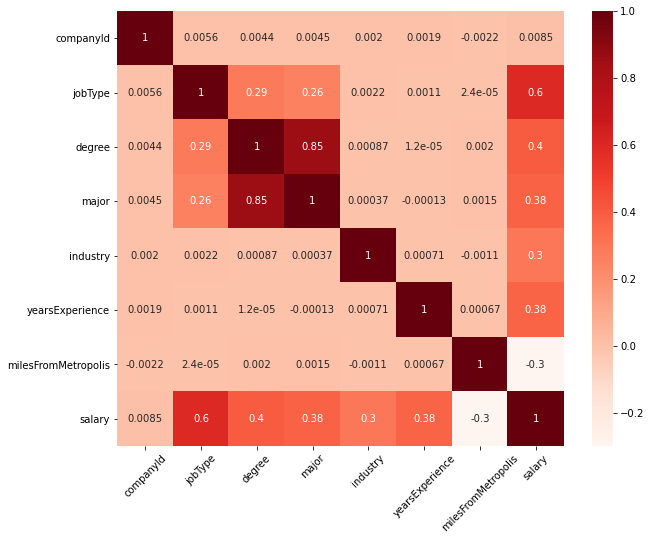

In [22]:
# use heatmap to determine correlations with each other
plt.figure(figsize=(10,8))
sns.heatmap(transform_df.iloc[:,1:].corr(), cmap='Reds', annot=True)
plt.xticks(rotation=45)
plt.show()

In the heatmap between salary and other features, companyId's corr is the weakest. Job type has the strongest correlation, distances from Metro area has negative correlation with salary.

## DEVELOP

### ---- Engineer features ----

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [24]:
# train df 
encoded_df = train_df.iloc[:, 3:].copy()
#test df
test_ec_df = test_feature_df.iloc[:, 2:].copy()

In [25]:
# feature label encoding
def Label_encoder(df, col):
    le = LabelEncoder()
    le.fit(df[col])
    df[col] = le.transform(df[col])

# label encoding train df
for i in encoded_df.columns:
    Label_encoder(encoded_df, i)
# label encoding test df
for i in test_ec_df.columns:
    Label_encoder(test_ec_df, i)

In [26]:
def group_feature(df, col):
    return df.groupby(by=col)

groups = group_feature(encoded_df, cat_feature[2:])

In [27]:
# train equal train features col
def groups_central_stat(groups, target):
    groups_df = pd.DataFrame({'groups_mean': groups[target].mean()})
    groups_df['groups_max'] = groups[target].max()
    groups_df['groups_min'] = groups[target].min()
    groups_df['groups_std'] = groups[target].std()
    groups_df['groups_median'] = groups[target].median()
    groups_df.reset_index(inplace=True)
    return groups_df

groups_df = groups_central_stat(groups, 'salary')

In [28]:
def groups_bin_stat(groups, target):
    groups_bin = pd.DataFrame({'groups_0%': groups[target].quantile(0.0)})
    groups_bin['groups_25%'] = groups[target].quantile(0.25)
    groups_bin['groups_50%'] = groups[target].quantile(0.50)
    groups_bin['groups_75%'] = groups[target].quantile(0.75)
    groups_bin['groups_100%'] = groups[target].quantile(1.0)
    groups_bin.reset_index(inplace=True)
    return groups_bin

groups_bin = groups_bin_stat(groups, 'salary')

In [29]:
# keys = col feature name
def merge_df(df1, df2, keys, fillna=False):
    df1 = pd.merge(df1, df2, on=keys, how='left')
    if fillna:
        df1.fillna(0, inplace=True)
    return df1

In [30]:
new_features = [groups_df, groups_bin]

for i in new_features:
    encoded_df = merge_df(encoded_df, i, cat_feature[2:], fillna=True)
    test_ec_df = merge_df(test_ec_df, i, cat_feature[2:], fillna=True)
    
print(encoded_df.shape)
print(test_ec_df.shape)

(999995, 17)
(1000000, 16)


### ---- model parameter tuning ----

In [33]:
# using label encoder feature for input 

# label encoding train df
X_encoded = encoded_df.drop(['salary'], axis=1)
y_encoded = encoded_df['salary']

In [ ]:
# tuning model parameters to get a better model
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(0,100,num=20)]
max_features = [float(x/(X_encoded.shape[0])) for x in np.linspace(0,80, num=20)]
max_depth = [int(x) for x in np.linspace(0,80, num=20)]
max_depth.append(None)
max_depth_gbr = [int(x) for x in np.linspace(0,25, num=20)]
max_depth_gbr.append(None)
min_samples_split = [int(x) for x in np.linspace(0,100,num=20)]
random_grid = {'n_estimators':n_estimators, 'max_features':max_features, 'max_depth':max_depth, 'min_samples_split':min_samples_split}
random_grid_gbr = {'n_estimators':n_estimators, 'max_depth':max_depth_gbr}

# check parameters
print(random_grid_gbr)

In [ ]:
# fitting models to get the best params
rf_ec = RandomForestRegressor()
gbr_ec = GradientBoostingRegressor()
rsCV_ec = RandomizedSearchCV(gbr_ec, param_distributions = random_grid_gbr, pre_dispatch=4, cv=2, verbose=1, random_state=1, n_jobs=4)
rsCV_ec.fit(X_encoded, y_encoded)

In [ ]:
rsCV_ec.best_params_

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [55, 60], 
             'max_features': [10, 11],
             'max_depth': [10, 20],
             'min_samples_split': [38, 40]}

param_grid_gbr = {'n_estimators': [80, 90], 
             'max_depth': [4, 5]}

In [ ]:
rf_gid = RandomForestRegressor()
gbr_gid = GradientBoostingRegressor()
grid = GridSearchCV(gbr_gid, param_grid= param_grid_gbr, cv=3, verbose=2, n_jobs=4)
grid.fit(X_encoded, y_encoded)

In [ ]:
grid.best_params_

### ---- Create models ----

In [34]:
# using label encoding for Random Forest Regressor and Gradient Boosting Regressor modeling
# using cross validation score to determine which model perform the best

def train_model(model, feature_df, target_df, num_procs, mean_mse, cv_std):
    neg_mse = cross_val_score(model, feature_df, target_df, cv=3, n_jobs=num_procs, scoring='neg_mean_squared_error')
    mean_mse[model] = -1.0*np.mean(neg_mse)
    cv_std[model] = np.std(neg_mse)

# print out summary and compare results
def print_summary(model, mean_mse, cv_std):
    print('\nModel:\n', model)
    print('Average MSE:\n', mean_mse[model])
    print('Standard deviation during CV:\n', cv_std[model])

models = []
mean_mse = {}
cv_std= {}
num_procs = 4
verbose_level = 0

reg = LinearRegression()
reg_poly = make_pipeline(PolynomialFeatures(), LinearRegression())
reg_scaled = make_pipeline(StandardScaler(), LinearRegression())
rf = RandomForestRegressor(n_estimators=55, n_jobs=num_procs, max_depth=10, min_samples_split=38,max_features=11, verbose=verbose_level,
                          random_state=1)
gbr = GradientBoostingRegressor(n_estimators=90, max_depth=5, loss='ls', verbose=verbose_level,
                               random_state=1)

models.extend([reg, reg_poly, reg_scaled, rf, gbr])

### ---- Test models ----

In [35]:
# testing model performance
for i in models:
    train_model(i, X_encoded, y_encoded, num_procs, mean_mse, cv_std)
    print_summary(i, mean_mse, cv_std)


Model:
 LinearRegression()
Average MSE:
 370.96553275442403
Standard deviation during CV:
 0.3716833357639392

Model:
 Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])
Average MSE:
 353.43874657720306
Standard deviation during CV:
 0.31957535606259496

Model:
 Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])
Average MSE:
 370.96553275442415
Standard deviation during CV:
 0.37168333576388884

Model:
 RandomForestRegressor(max_depth=10, max_features=11, min_samples_split=38,
                      n_estimators=55, n_jobs=4, random_state=1)
Average MSE:
 357.36138802052636
Standard deviation during CV:
 0.45489731554497714

Model:
 GradientBoostingRegressor(max_depth=5, n_estimators=90, random_state=1)
Average MSE:
 354.9701752325331
Standard deviation during CV:
 0.4459250294280207


### ---- Select best model  ----

In [36]:
# choice the best model
def best_model(mean_mse):
    return min(mean_mse, key=mean_mse.get)

best_model = best_model(mean_mse)
print(best_model)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])


### ---- Examine feature importance  ----

In [37]:
# use gbr model to check every train feature's importances
def create_feature_importance(model, train_df):
    importances = model.feature_importances_
    feature_importances_df = pd.DataFrame({'features': train_df.columns, 'importances': importances})
    feature_importances_df.sort_values(by='importances', ascending = False, inplace=True)
    feature_importances_df.set_index('features', inplace=True, drop=True)
    return feature_importances_df

model_gbr = gbr
gbr.fit(X_encoded, y_encoded)
feature_importance = create_feature_importance(gbr, X_encoded)
print(feature_importance)

                     importances
features                        
groups_mean             0.621016
yearsExperience         0.185851
milesFromMetropolis     0.128117
groups_25%              0.034744
groups_50%              0.011695
groups_75%              0.009803
groups_median           0.003258
groups_min              0.002279
groups_0%               0.001849
groups_std              0.001205
groups_100%             0.000072
groups_max              0.000070
major                   0.000014
jobType                 0.000013
industry                0.000007
degree                  0.000006


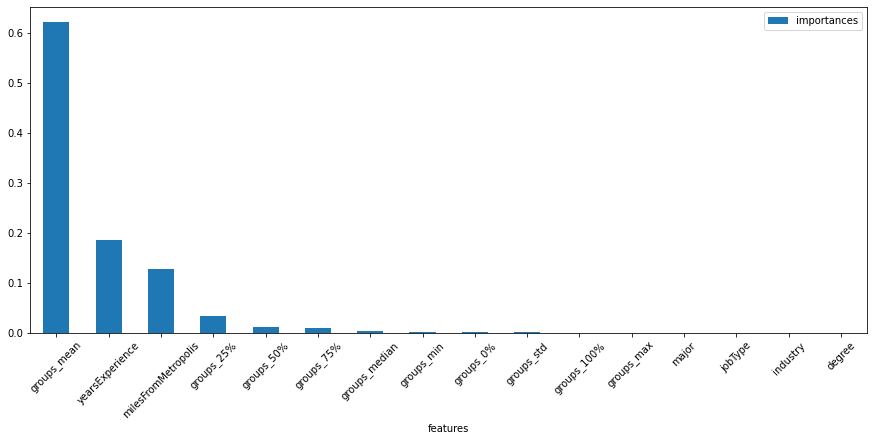

In [38]:
def plot_feature_importance(fm_df):
    fm_df.plot.bar(figsize=(15,6))
    plt.xticks(rotation=45)
    plt.show()
    
plot_feature_importance(feature_importance)

## DEPLOY

### ---- Deploy model ----

In [42]:
# use the best model for test data 
def get_prediction(model, train_df, target_df, test_df):
    model.fit(train_df, target_df)
    yhat = model.predict(test_df)
    return yhat

yhat_ec = get_prediction(best_model, X_encoded, y_encoded, test_ec_df)

### ---- save prediction results ----

In [43]:
# save the best model results
# model is the best one, mean_mse = mean_mse[model], predictions = yhat of test df
def save_results(model, mean_mse, predictions, feature_importances):
    '''saves model, model summary, feature importances, and predictions'''
    with open('model.txt', 'w') as file:
        file.write(str(model))
    feature_importances.to_csv('feature_importances.csv') 
    np.savetxt('predictions.csv', predictions, delimiter=',')
    
save_results(best_model, mean_mse[best_model], yhat_ec, feature_importance)

## COMMENT

After feature engineering, the MSE decreased to 353, using gbr model's attribute feature importances, we can see the relevant features are groups mean, years of experience, distance from Metro and groups of IQR(25%, 50%, 75%) statistics. 